In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import sys
import tqdm
from tqdm import tqdm

In [27]:
# print the python version and the numpy version
print(f"The python version is {sys.version}")
print(f"The numpy version is {np.__version__}")

The python version is 3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]
The numpy version is 1.24.3


In [28]:
# Import the datasets

graduate_admission = pd.read_csv(r"..\datasets\graduate_admission\Admission_6pc.csv")
student_performance = pd.read_csv(r"..\datasets\student_performance\Performance.csv")

# get the y values from different datasets
graduate_admission_y = pd.read_csv(r"..\datasets\graduate_admission\Admission_Predict_Ver1.1.csv")
student_performance_y = pd.read_csv(r"..\datasets\student_performance\Student_Performance.csv")

# get the y values from the datasets
graduate_admission_y = graduate_admission_y["Chance of Admit "]
student_performance_y = student_performance_y["Performance Index"]

# merge the y values with the datasets
graduate_admission = pd.concat([graduate_admission, graduate_admission_y], axis=1)
student_performance = pd.concat([student_performance, student_performance_y], axis=1)

# remove the 1st column of both datasets
graduate_admission = graduate_admission.drop(graduate_admission.columns[0], axis=1)
student_performance = student_performance.drop(student_performance.columns[0], axis=1)


In [29]:
graduate_admission.head()

,PC1_admission,PC2_admission,PC3_admission,PC4_admission,PC5_admission,PC6_admission,Chance of Admit
0,0.571733,0.193734,1.005083,1.764012,-1.211887,2.821290,0.92
1,-0.193007,0.489468,-0.098955,0.726842,-0.427980,1.340100,0.76
2,-0.333299,0.638475,-0.865193,0.440762,-0.266765,-0.633913,0.72
3,0.913848,-0.158884,-0.135557,1.176322,-0.782358,-0.302018,0.80
4,-0.083752,-0.212955,-0.215070,-1.200026,1.220721,-0.961045,0.65


In [30]:
student_performance.head()

,PC1_performance,PC2_performance,PC3_performance,PC4_performance,PC5_performance,Performance Index
0,-1.985283,-0.287611,-1.479808,1.666934,-0.444765,91.0
1,0.412458,-0.956282,-0.317899,-1.563469,-0.733942,65.0
2,-0.269974,0.198550,-1.472732,0.487430,1.388395,45.0
3,-0.370811,-0.652316,-0.621865,-0.478771,1.788151,36.0
4,0.792080,0.666538,-0.461006,0.390212,-1.402578,66.0


In [31]:
# Check for missing values in the graduate admission dataset
print("Null values in each feature of the Graduate Admission Dataset:")
print(graduate_admission.isnull().sum())

Null values in each feature of the Graduate Admission Dataset:
PC1_admission       0
PC2_admission       0
PC3_admission       0
PC4_admission       0
PC5_admission       0
PC6_admission       0
Chance of Admit     0
dtype: int64


In [32]:
# Check for missing values in the student performance dataset
print("Null values in each feature of the Student Performance Dataset:")
print(student_performance.isnull().sum())

Null values in each feature of the Student Performance Dataset:
PC1_performance      0
PC2_performance      0
PC3_performance      0
PC4_performance      0
PC5_performance      0
Performance Index    0
dtype: int64


In [33]:
# get the datasets as numpy arrays if they are not already numpy arrays
if not isinstance(graduate_admission, np.ndarray):
    graduate_admission = graduate_admission.values
    print("graduate_admission dataset has been changed to a numpy array")
else:
    print("graduate_admission dataset is already a numpy array")

if not isinstance(student_performance, np.ndarray):
    student_performance = student_performance.values
    print("student_performance dataset has been changed to a numpy array")
else:
    print("student_performance dataset is already a numpy array")

# Split the datasets into features and target variables
X_graduate_admission = graduate_admission[:, 1:-1]
y_graduate_admission = graduate_admission[:, -1]

X_student_performance = student_performance[:, :-1]
y_student_performance = student_performance[:, -1]

# shuffle the datasets
np.random.seed(23) # the answer to the ultimate question of life, the universe, and everything ;)
shuffle_index = np.random.permutation(len(X_graduate_admission))
X_graduate_admission, y_graduate_admission = X_graduate_admission[shuffle_index], y_graduate_admission[shuffle_index]

shuffle_index = np.random.permutation(len(X_student_performance))
X_student_performance, y_student_performance = X_student_performance[shuffle_index], y_student_performance[shuffle_index]

# print the shapes of the datasets
print("Graduate Admission Dataset:")
print("X shape:", X_graduate_admission.shape)
print("y shape:", y_graduate_admission.shape)

print("\nStudent Performance Dataset:")
print("X shape:", X_student_performance.shape)
print("y shape:", y_student_performance.shape)

graduate_admission dataset has been changed to a numpy array
student_performance dataset has been changed to a numpy array
Graduate Admission Dataset:
X shape: (500, 5)
y shape: (500,)

Student Performance Dataset:
X shape: (10000, 5)
y shape: (10000,)


In [34]:
# split the datasets into training and testing sets using 90% for training and 10% for testing

X_graduate_admission_train, X_graduate_admission_test = X_graduate_admission[:int(0.9*len(X_graduate_admission))], X_graduate_admission[int(0.9*len(X_graduate_admission)):]
y_graduate_admission_train, y_graduate_admission_test = y_graduate_admission[:int(0.9*len(y_graduate_admission))], y_graduate_admission[int(0.9*len(y_graduate_admission)):]

X_student_performance_train, X_student_performance_test = X_student_performance[:int(0.9*len(X_student_performance))], X_student_performance[int(0.9*len(X_student_performance)):]
y_student_performance_train, y_student_performance_test = y_student_performance[:int(0.9*len(y_student_performance))], y_student_performance[int(0.9*len(y_student_performance)):]

# print the shapes of the training and testing sets
print("Graduate Admission Dataset:")
print("X_train shape:", X_graduate_admission_train.shape)
print("y_train shape:", y_graduate_admission_train.shape)
print("X_test shape:", X_graduate_admission_test.shape)
print("y_test shape:", y_graduate_admission_test.shape)

print("\nStudent Performance Dataset:")
print("X_train shape:", X_student_performance_train.shape)
print("y_train shape:", y_student_performance_train.shape)
print("X_test shape:", X_student_performance_test.shape)
print("y_test shape:", y_student_performance_test.shape)

Graduate Admission Dataset:
X_train shape: (450, 5)
y_train shape: (450,)
X_test shape: (50, 5)
y_test shape: (50,)

Student Performance Dataset:
X_train shape: (9000, 5)
y_train shape: (9000,)
X_test shape: (1000, 5)
y_test shape: (1000,)


In [35]:
# check if CUDA is available
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('CUDA is available')
    print(f"CUDA version: {torch.version.cuda}")
    print (f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Total GPU memory: {torch.cuda.get_device_properties(0).total_memory/1024**3:.2f} GB")
else:
    device = torch.device('cpu')
    print('CUDA is not available')

CUDA is available
CUDA version: 12.1
GPU: NVIDIA GeForce GTX 1650 with Max-Q Design
Total GPU memory: 4.00 GB


In [39]:
class myNeuralNet:
    
    def __init__(self, input_size, hidden_size_1, hidden_size_2, hidden_size_3, output_size=1):
        self.input_size = input_size
        self.hidden_size_1 = hidden_size_1
        self.output_size = output_size
        
        c = 0.1
        
        self.W1 = c*torch.rand(input_size, hidden_size_1, dtype=torch.float64, device=device)
        self.b1 = c*torch.rand(hidden_size_1, dtype=torch.float64, device=device)
        
        self.W2 = c*torch.rand(hidden_size_1, hidden_size_2, dtype=torch.float64, device=device)
        self.b2 = c*torch.rand(hidden_size_2, dtype=torch.float64, device=device)
        
        self.W3 = c*torch.rand(hidden_size_2, hidden_size_3, dtype=torch.float64, device=device)
        self.b3 = c*torch.rand(hidden_size_3, dtype=torch.float64, device=device)
        
        self.W4 = c*torch.rand(hidden_size_3, output_size, dtype=torch.float64, device=device)
        self.b4 = c*torch.rand(output_size, dtype=torch.float64, device=device)
        
    def forward(self, X, dropout_1=0, dropout_2=0, dropout_3=0):
        
        self.dropout_1 = dropout_1
        self.dropout_2 = dropout_2
        self.dropout_3 = dropout_3
        # use dropout in the hidden layers
        self.X = X
        self.z1 = torch.matmul(X, self.W1) + self.b1
        self.a1 = self.leaky_relu(self.z1)
        self.a1 = self.z1
        self.d1 = np.random.rand(*self.a1.shape) > dropout_1
        self.d1 = torch.tensor(self.d1, dtype=torch.float64, device=device)
        self.a1 *= self.d1
        self.z2 = torch.matmul(self.a1, self.W2) + self.b2
        self.a2 = self.leaky_relu(self.z2)
        self.a2 = self.z2
        self.d2 = np.random.rand(*self.a2.shape) > dropout_2
        self.d2 = torch.tensor(self.d2, dtype=torch.float64, device=device)
        self.a2 *= self.d2
        self.z3 = torch.matmul(self.a2, self.W3) + self.b3
        self.a3 = self.leaky_relu(self.z3)
        self.a3 = self.z3
        self.d3 = np.random.rand(*self.a3.shape) > dropout_3
        self.d3 = torch.tensor(self.d3, dtype=torch.float64, device=device)
        self.a3 *= self.d3
        self.z4 = torch.matmul(self.a3, self.W4) + self.b4
        self.a4 = self.z4
        return self.a4
    
    def backward(self, X, y, learning_rate=0.01, dropout_1=0, dropout_2=0, dropout_3=0, weight_decay=0.01, momentum=0.9):
        
        self.dropout_1 = dropout_1
        self.dropout_2 = dropout_2
        self.dropout_3 = dropout_3
        self.weight_decay = weight_decay
        self.momentum = momentum
        
        use_previous_deltas = False
        if hasattr(self, 'dW1'):
            previous_deltas = [self.dW1, self.dW2, self.dW3, self.dW4]
            previous_biases_deltas = [self.db1, self.db2, self.db3, self.db4]
            use_previous_deltas = True
            
        
        self.y_hat = self.forward(X, dropout_1, dropout_2, dropout_3)
        y = torch.tensor(y, dtype=torch.float64, device=device).reshape(-1, 1)
        
        self.dz4 = (self.y_hat - y)
        self.dW4 = torch.matmul(self.a3.T, self.dz4)
        self.db4 = torch.sum(self.dz4, axis=0) / X.shape[0]
        
        self.dz3 = torch.matmul(self.dz4, self.W4.T)
        # self.dz3 *= self.d3
        self.dz3 = self.dz3 * self.leaky_relu_derivative(self.z3)
        self.dW3 = torch.matmul(self.a2.T, self.dz3)
        self.db3 = torch.sum(self.dz3, axis=0) / X.shape[0]
        
        self.dz2 = torch.matmul(self.dz3, self.W3.T)
        # self.dz2 *= self.d2
        self.dz2 = self.dz2 * self.leaky_relu_derivative(self.z2)
        self.dW2 = torch.matmul(self.a1.T, self.dz2)
        self.db2 = torch.sum(self.dz2, axis=0) / X.shape[0]
        
        self.dz1 = torch.matmul(self.dz2, self.W2.T)
        # self.dz1 *= self.d1
        self.dz1 = self.dz1 * self.leaky_relu_derivative(self.z1)
        self.dW1 = torch.matmul(X.T, self.dz1)
        self.db1 = torch.sum(self.dz1, axis=0) / X.shape[0]
        
        # add weight decay and momentum
        self.dW1 += self.weight_decay * self.W1
        self.dW2 += self.weight_decay * self.W2
        self.dW3 += self.weight_decay * self.W3
        self.dW4 += self.weight_decay * self.W4
        
        # add momentum if previous deltas exist
        if use_previous_deltas:
            self.dW1 += self.momentum * previous_deltas[0]
            self.dW2 += self.momentum * previous_deltas[1]
            self.dW3 += self.momentum * previous_deltas[2]
            self.dW4 += self.momentum * previous_deltas[3]
            
            self.db1 += self.momentum * previous_biases_deltas[0]
            self.db2 += self.momentum * previous_biases_deltas[1]
            self.db3 += self.momentum * previous_biases_deltas[2]
            self.db4 += self.momentum * previous_biases_deltas[3]       
        
        # clip the gradients
        clip_value = 10
        self.dW1 = torch.clamp(self.dW1, -clip_value, clip_value)
        self.db1 = torch.clamp(self.db1, -clip_value, clip_value)
        self.dW2 = torch.clamp(self.dW2, -clip_value, clip_value)
        self.db2 = torch.clamp(self.db2, -clip_value, clip_value)
        self.dW3 = torch.clamp(self.dW3, -clip_value, clip_value)
        self.db3 = torch.clamp(self.db3, -clip_value, clip_value)
        self.dW4 = torch.clamp(self.dW4, -clip_value, clip_value)
        self.db4 = torch.clamp(self.db4, -clip_value, clip_value)
                
        # update the weights and biases
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2
        self.W3 -= learning_rate * self.dW3
        self.b3 -= learning_rate * self.db3
        self.W4 -= learning_rate * self.dW4
        self.b4 -= learning_rate * self.db4
        
        
    def leaky_relu(self, x):
        return torch.where(x > 0, x, x * 0.1)
    
    def leaky_relu_derivative(self, x):
        return torch.where(x > 0, 1, 0.1)
    
    def sigmoid(self, x):
        return 1/(1 + torch.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

In [37]:
# convert the numpy arrays to torch tensors
X_student_performance_train = torch.tensor(X_student_performance_train, dtype=torch.float64, device=device)
y_student_performance_train = torch.tensor(y_student_performance_train, dtype=torch.float64, device=device)

X_student_performance_test = torch.tensor(X_student_performance_test, dtype=torch.float64, device=device)
y_student_performance_test = torch.tensor(y_student_performance_test, dtype=torch.float64, device=device)

X_graduate_admission_train = torch.tensor(X_graduate_admission_train, dtype=torch.float64, device=device)
y_graduate_admission_train = torch.tensor(y_graduate_admission_train, dtype=torch.float64, device=device)

X_graduate_admission_test = torch.tensor(X_graduate_admission_test, dtype=torch.float64, device=device)
y_graduate_admission_test = torch.tensor(y_graduate_admission_test, dtype=torch.float64, device=device)

In [13]:
# train the neural network
input_size = X_graduate_admission_train.shape[1]
val_losses = []
best_model_val_losses = []
learning_rates = []
best_val_loss = np.inf
best_neural_net_weights = None
best_neural_net_best_weights = None
last_neural_net_weights = None
best_neural_net_last_weights = None
best_choice = None
best_MSE = np.inf
output_size = 1
k = 10 # for k-fold cross-validation
search_length = 50

lr_max_choices = [0.05, 0.01, 0.001, 0.0001]
# lr_max_choices = [0.01] # for testing
dropout_1_choices = [0, 0.1, 0.3, 0.5]
dropout_2_choices = [0, 0.1, 0.3, 0.5]
dropout_3_choices = [0, 0.1, 0.3, 0.5]
weight_decay_choices = [0.001, 0.01, 0.1]
momentum_choices = [0.2, 0.5, 0.9]
epochs_choices = [20, 50, 100, 200]
# epochs_choices = [10] # for testing
batch_size_choices = [10, 20, 50]
hidden_size_1_choices = [50, 100, 200]
hidden_size_2_choices = [20, 50, 100]
hidden_size_3_choices = [10, 20, 50]

for search in tqdm(range(search_length)):
    # randomly choose the hyper-parameters
    lr_max = np.random.choice(lr_max_choices)
    dropout_1 = np.random.choice(dropout_1_choices)
    dropout_2 = np.random.choice(dropout_2_choices)
    dropout_3 = np.random.choice(dropout_3_choices)
    weight_decay = np.random.choice(weight_decay_choices)
    momentum = np.random.choice(momentum_choices)
    epochs = np.random.choice(epochs_choices)
    batch_size = np.random.choice(batch_size_choices)
    hidden_size_1 = np.random.choice(hidden_size_1_choices)
    hidden_size_2 = np.random.choice(hidden_size_2_choices)
    hidden_size_3 = np.random.choice(hidden_size_3_choices)    
    
    # split the training set into k-folds
    X_folds = torch.split(X_graduate_admission_train, len(X_graduate_admission_train)//k)
    y_folds = torch.split(y_graduate_admission_train, len(y_graduate_admission_train)//k)

    # use tqdm to show the progress bar
    for i in range(k): # 1 should be k for k-fold cross-validation
        # define the train and validation sets
        X_val = X_folds[i]
        y_val = y_folds[i]
        X_train = [X_folds[j] for j in range(k) if j != i]
        y_train = [y_folds[j] for j in range(k) if j != i]
        X_train = torch.cat(X_train, dim=0)
        y_train = torch.cat(y_train, dim=0)
        # reset the weights and biases for the next fold
        neural_net = myNeuralNet(input_size=input_size, hidden_size_1=hidden_size_1, hidden_size_2=hidden_size_2, hidden_size_3=hidden_size_3, output_size=output_size)

        val_losses = []
        best_val_loss = np.inf
        learning_rates = []
        best_val_loss = np.inf
        best_neural_net_weights = None
        last_neural_net_weights = None
        
        # show the progress bar with the which fold we are training on
        for epoch in range(epochs):
            # use cosine learning rate decay
            learning_rate = 0.5 * lr_max * (1 + np.cos(np.pi * epoch/epochs))
            learning_rates.append(learning_rate)
            for j in range(0, len(X_train), batch_size):
                X_batch = X_train[j:j+batch_size]
                y_batch = y_train[j:j+batch_size]
                neural_net.backward(X=X_batch, y=y_batch, learning_rate=learning_rate, dropout_1=dropout_1, dropout_2=dropout_2, dropout_3=dropout_3, weight_decay=weight_decay, momentum=momentum)
            
            # calculate the validation loss, take the average of the losses for each fold k
            y_val_hat = neural_net.forward(X_val) # we don't use dropout in predicting on the validation set.
            val_loss = torch.mean((y_val - y_val_hat)**2)
            val_losses.append(val_loss)
            
            if val_loss < best_val_loss and not np.isnan(val_loss.item()):
                best_val_loss = val_loss
                best_neural_net_weights = [neural_net.W1, neural_net.b1, neural_net.W2, neural_net.b2, neural_net.W3, neural_net.b3, neural_net.W4, neural_net.b4]
                
    last_neural_net_weights = [neural_net.W1, neural_net.b1, neural_net.W2, neural_net.b2, neural_net.W3, neural_net.b3, neural_net.W4, neural_net.b4]

    # take the average of the validation losses for each fold k
    val_losses = [val_loss.cpu().detach().numpy() for val_loss in val_losses]
    average_val_losses = []
    
    # take the average of the validation losses for each k-fold
    for i in range(0, epochs):
        average_val_losses.append(np.mean(val_losses[i::epochs]))
    
    val_losses = average_val_losses
    
    # look at the best validation losses for each hyper-parameter combination
    MSE = val_losses[-1].item() # take the last validation loss
    # MSE = min(val_losses).item() # take the minimum validation loss
    
    # check if the current hyper-parameters are the best
    if MSE < best_MSE:
        best_MSE = MSE
        # save the best hyper-parameters as dictionary
        best_choice = {"lr_max": lr_max, "dropout_1": dropout_1, "dropout_2": dropout_2, "dropout_3": dropout_3, "weight_decay": weight_decay, "momentum": momentum, "epochs": epochs, "batch_size": batch_size, "hidden_size_1": hidden_size_1, "hidden_size_2": hidden_size_2, "hidden_size_3": hidden_size_3}
        # save the best weights 
        best_model_val_losses = val_losses
        best_neural_net_best_weights = best_neural_net_weights
        best_neural_net_last_weights = last_neural_net_weights

val_losses = best_model_val_losses

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\NSagi\AppData\Local\Temp\ipykernel_12472\3764147028.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float64, device=device).reshape(-1, 1)
100%|██████████| 50/50 [3:45:36<00:00, 270.73s/it]   


In [14]:
# define the best neural network
neural_net = myNeuralNet(input_size=input_size, hidden_size_1=best_choice["hidden_size_1"], hidden_size_2=best_choice["hidden_size_2"], hidden_size_3=best_choice["hidden_size_3"], output_size=output_size)

neural_net.W1 = best_neural_net_best_weights[0]
neural_net.b1 = best_neural_net_best_weights[1]
neural_net.W2 = best_neural_net_best_weights[2]
neural_net.b2 = best_neural_net_best_weights[3]
neural_net.W3 = best_neural_net_best_weights[4]
neural_net.b3 = best_neural_net_best_weights[5]
neural_net.W4 = best_neural_net_best_weights[6]
neural_net.b4 = best_neural_net_best_weights[7]

In [15]:
print("Best hyper-parameters:")
print(best_choice)

Best hyper-parameters:
{'lr_max': 0.05, 'dropout_1': 0.1, 'dropout_2': 0.3, 'dropout_3': 0.5, 'weight_decay': 0.01, 'momentum': 0.5, 'epochs': 50, 'batch_size': 50, 'hidden_size_1': 100, 'hidden_size_2': 50, 'hidden_size_3': 10}


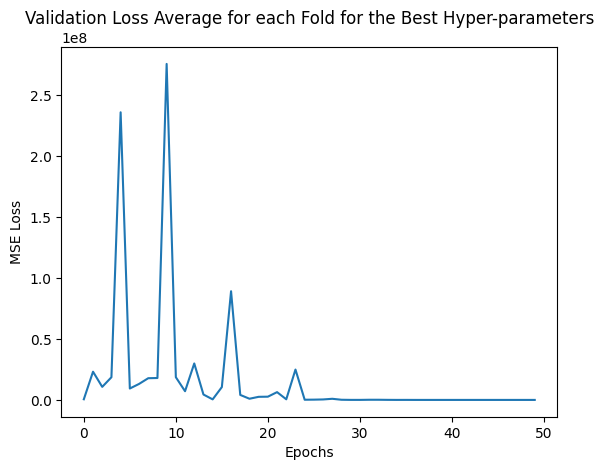

In [16]:
plt.plot(val_losses)
plt.title("Validation Loss Average for each Fold for the Best Hyper-parameters")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

Text(0, 0.5, 'Learning Rate')

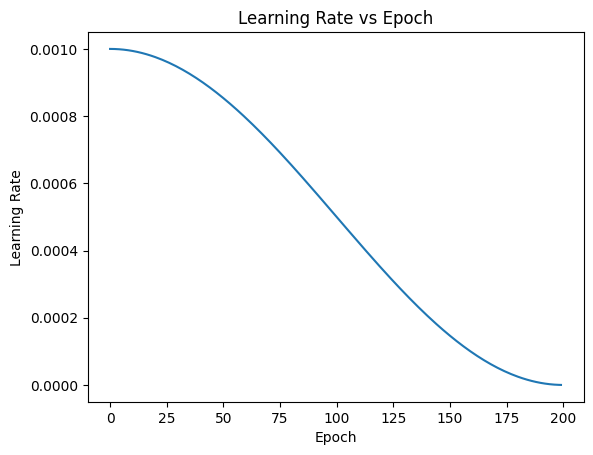

In [17]:
# plot the learning rates for 1 k-fold
lr = learning_rates[:epochs]
plt.plot(lr)
plt.title("Learning Rate vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")


In [18]:
# print the last validation loss
print(f"The last validation loss in the best model is {val_losses[-1]}")

# print the best validation loss
print(f"The best validation loss in the best model is {min(val_losses)}")

The last validation loss in the best model is 0.02205340318142632
The best validation loss in the best model is 0.02205340318142632


In [40]:
# best_choice = {'lr_max': 0.05, 'dropout_1': 0.1, 'dropout_2': 0.3, 'dropout_3': 0.5, 'weight_decay': 0.01, 'momentum': 0.5, 'epochs': 50, 'batch_size': 50, 'hidden_size_1': 100, 'hidden_size_2': 50, 'hidden_size_3': 10}
# train the neural network on the whole training set before testing
neural_net = myNeuralNet(input_size=input_size, hidden_size_1=best_choice["hidden_size_1"], hidden_size_2=best_choice["hidden_size_2"], hidden_size_3=best_choice["hidden_size_3"], output_size=output_size)

# train the neural network
for epoch in tqdm(range(epochs)):
    # use cosine learning rate decay
    learning_rate = 0.5 * lr_max * (1 + np.cos(np.pi * epoch/epochs))
    for j in range(0, len(X_graduate_admission_train), batch_size):
        X_batch = X_graduate_admission_train[j:j+batch_size]
        y_batch = y_graduate_admission_train[j:j+batch_size]
        neural_net.backward(X=X_batch, y=y_batch, learning_rate=best_choice["lr_max"], dropout_1=best_choice["dropout_1"], dropout_2=best_choice["dropout_2"], dropout_3=best_choice["dropout_3"], weight_decay=best_choice["weight_decay"], momentum=best_choice["momentum"])

  0%|          | 0/200 [00:00<?, ?it/s]C:\Users\NSagi\AppData\Local\Temp\ipykernel_12472\2144131560.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float64, device=device).reshape(-1, 1)
100%|██████████| 200/200 [00:16<00:00, 12.48it/s]


In [41]:
# test the neural network
y_hat = neural_net.forward(X_graduate_admission_test)
# clip the predictions to be between 0 and 100
y_hat = torch.clamp(y_hat, 0, 1)
# go through the test set and calculate the MAE, MSE, and R2 score
MAE = 0
MSE = 0
R2 = 0

for i in range(len(X_graduate_admission_test)):
    y_hat = neural_net.forward(X_graduate_admission_test[i])
    MAE += torch.abs(y_hat - y_graduate_admission_test[i]).item()
    MSE += (y_hat - y_graduate_admission_test[i])**2
    R2 += 1 - (y_hat - y_graduate_admission_test[i])**2/(y_graduate_admission_test[i] - torch.mean(y_graduate_admission_test))**2

MAE = MAE/len(X_student_performance_test)
MSE = MSE.item()/len(X_student_performance_test)
R2 = R2.item()/len(X_student_performance_test)

print("Graduate Admission Dataset(trained on training+validation data):")
print(f"MAE: {MAE:.4f}")
print(f"MSE: {MSE:.4f}")
print(f"R2: {R2:.4f}")

Graduate Admission Dataset(trained on training+validation data):
MAE: 0.0102
MSE: 0.0031
R2: -5.5869


In [21]:
# print the weights and biases
print("Weights and Biases:")
print(f"W1: {neural_net.W1*1000}")
print(f"b1: {neural_net.b1*1000}")
print(f"W2: {neural_net.W2*1000}")
print(f"b2: {neural_net.b2*1000}")
print(f"W3: {neural_net.W3*1000}")
print(f"b3: {neural_net.b3*1000}")
print(f"W4: {neural_net.W4*1000}")
print(f"b4: {neural_net.b4*1000}")

Weights and Biases:
W1: tensor([[-2.2601e+01, -2.9302e+01, -3.1230e+01, -1.7469e+01, -2.5334e+01,
         -3.2839e+01, -9.6103e+00, -3.9725e+01, -2.3009e+01, -1.5048e+01,
         -2.5304e+01, -1.0793e+01, -2.0416e+01, -2.2200e+01, -2.2512e+01,
         -2.3170e+01, -2.1252e+01, -3.1958e+01, -1.9846e+01, -3.3178e+01,
         -3.5242e+01, -2.8313e+01, -1.9763e+01, -3.1128e+00, -2.9440e+01,
         -2.0278e+01, -1.6360e+01, -3.5030e+01, -3.8664e+00, -7.8327e+00,
          2.2573e+00, -1.0079e+01, -1.7297e+01, -3.5397e+01, -2.2031e+01,
         -1.8319e+01, -1.1412e+01, -2.5581e+01, -1.3451e+01, -1.8764e+01,
         -2.1652e+01, -6.9519e+00, -2.0208e+01, -2.4480e+01, -1.0849e+01,
          2.7490e-01, -2.1074e+01, -3.0073e+01, -8.7967e+00, -6.3328e+00,
         -2.9632e+01, -2.3311e+00, -3.0332e+00, -3.7836e+01, -1.4537e+01,
         -2.6820e+01, -1.6739e+01,  5.7963e-01, -2.9709e+00, -3.2244e+01,
         -1.8529e+01, -2.3899e+00, -1.3558e+01, -3.1282e+01, -4.0863e+00,
         -2.99

In [22]:
# print a prediction and true value as long as I press space and exit when I press esc
for j in range(20):
    i = np.random.randint(len(X_graduate_admission_test))
    # select a random sample from the test set
    X = X_graduate_admission_test[i]
    y = y_graduate_admission_test[i]
    # predict the value
    y_hat = neural_net.forward(X)
    y_hat = torch.clamp(y_hat, 0, 1)
    # print the results
    print(f"Prediction: {y_hat.item():.2f} True Value: {y.item():.2f}")

        

Prediction: 1.00 True Value: 0.82
Prediction: 0.89 True Value: 0.78
Prediction: 1.00 True Value: 0.89
Prediction: 1.00 True Value: 0.89
Prediction: 0.89 True Value: 0.78
Prediction: 0.89 True Value: 0.78
Prediction: 0.89 True Value: 0.78
Prediction: 0.23 True Value: 0.47
Prediction: 0.76 True Value: 0.57
Prediction: 0.17 True Value: 0.47
Prediction: 1.00 True Value: 0.82
Prediction: 0.92 True Value: 0.55
Prediction: 1.00 True Value: 0.89
Prediction: 0.79 True Value: 0.75
Prediction: 1.00 True Value: 0.94
Prediction: 1.00 True Value: 0.86
Prediction: 0.36 True Value: 0.52
Prediction: 0.01 True Value: 0.46
Prediction: 0.79 True Value: 0.75
Prediction: 1.00 True Value: 0.82


In [23]:
# save the model
torch.save(neural_net, "graduate_admission_neural_net.pt")
print("Model saved as graduate_admission_neural_net.pt")

Model saved as graduate_admission_neural_net.pt


In [24]:
# load the best weights
neural_net.W1 = best_neural_net_last_weights[0]
neural_net.b1 = best_neural_net_last_weights[1]
neural_net.W2 = best_neural_net_last_weights[2]
neural_net.b2 = best_neural_net_last_weights[3]
neural_net.W3 = best_neural_net_last_weights[4]
neural_net.b3 = best_neural_net_last_weights[5]
neural_net.W4 = best_neural_net_last_weights[6]
neural_net.b4 = best_neural_net_last_weights[7]


In [25]:
# go through the test set and calculate the MAE, MSE, and R2 score
MAE = 0
MSE = 0
R2 = 0

for i in range(len(X_graduate_admission_test)):
    y_hat = neural_net.forward(X_graduate_admission_test[i])
    MAE += torch.abs(y_hat - y_graduate_admission_test[i]).item()
    MSE += (y_hat - y_graduate_admission_test[i])**2
    R2 += 1 - (y_hat - y_graduate_admission_test[i])**2/(y_graduate_admission_test[i] - torch.mean(y_graduate_admission_test))**2

print("Graduate Admission Dataset(trained on just training data)(last weight):")
print(f"MAE: {MAE/len(X_graduate_admission_test):.4f}")
print(f"MSE: {MSE[0]/len(X_graduate_admission_test):.4f}")
print(f"R2: {R2[0]/len(X_graduate_admission_test):.4f}")


Graduate Admission Dataset(trained on just training data)(last weight):
MAE: 0.1354
MSE: 0.0285
R2: -17.1008
